# Income Prediction

## Objectives

To understand what determines an American citizen's `income` by comparing the different attributes in the dataset.

---

## Data Preparation & Cleaning

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Import Dataset

In [2]:
raw_df = pd.read_csv('adult.csv')
raw_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### Clean Dataset

There are few things we need to do for the cleaning of dataset.

1. Removing columns `education`, `capital.gain` and `capital.loss`
2. Removing other countries except United States in `native.country`
3. Removing values with “?” in `workclass`, `native.country` and `occupation`
4. Removing datas with `Without-pay` and `Never-worked` in `workclass`
5. Group attributes in `workclass` by `Gov`, `Self-employed` and `Private` respectively
6. Removing Null values   

#### 1. Removing columns `education`, `capital.gain`, `capital.loss` and `fnlwgt`

We can remove the redundant columns as they are not important in this project. Retaining these unnecessary data will take up redundant space and also potentially increase runtime. Pandas provides a handy way of removing unwanted columns or rows from a DataFrame with the drop() function.


It seems that `fnlwgt` tells the proportion of the population that has the same set of features. In simple terms, every row in the original table was re-duplicated and `fnlwgt` stores the number of rows with the same value. However, it is impossible to multiply for all columns due to the large amounts of data to be compared then, hence, categorizing and compiling the data will be the best solution to have the most diversified data possible for our defined solution. Additionally, Census Bureau has provided a more simplified dataset possible for us to be able to analyze it in a bite-sized level. Hence we do not need this column for model training and we would be assuming each row as a single input dataset.

In [3]:
# Removing redundant columns
to_drop = ['education', 'capital.gain', 'capital.loss', 'fnlwgt']
raw_df.drop(columns=to_drop, inplace=True, axis=1)
raw_df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,?,9,Widowed,?,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,?,10,Widowed,?,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


#### 2. Removing other countries except United States in `native.country`

Our project focuses on the American people with `native.country` of United-States only. Hence, we would remove all the other countries in the dataset.

In [4]:
raw_df = raw_df[raw_df['native.country'].str.contains('United-States', na=False)]
raw_df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,?,9,Widowed,?,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,?,10,Widowed,?,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


In [5]:
# we confirm that there is only 1 unique value, 'United-States' in 'native.country'
raw_df['native.country'].value_counts()

United-States    29170
Name: native.country, dtype: int64

#### 3. Removing values with “?” in dataset

The value '?' provides no meaning for our analysis. Hence, we would remove datas containing this value in any of the columns in the dataset.

In [6]:
for column in raw_df:
    raw_df = raw_df[raw_df[column] != '?']
raw_df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


#### 4. Removing datas with `Without-pay` in `workclass`

We will only look at those in the `government`, `private` and `self-employed` sector that are drawing income.

In [7]:
#look at the different values under 'workclass'
raw_df['workclass'].value_counts()

Private             20135
Self-emp-not-inc     2313
Local-gov            1956
State-gov            1210
Self-emp-inc          991
Federal-gov           886
Without-pay            13
Name: workclass, dtype: int64

In [8]:
raw_df = raw_df[raw_df['workclass'] != 'Without-pay' ]
raw_df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


In [9]:
#Check to see if 'Without-pay' and 'Never-worked' have been removed successfully
raw_df['workclass'].value_counts()

Private             20135
Self-emp-not-inc     2313
Local-gov            1956
State-gov            1210
Self-emp-inc          991
Federal-gov           886
Name: workclass, dtype: int64

#### 5. Group attributes in `workclass` by `Gov`, `Self-employed` and `Private` respectively

Datas with `Local-gov`, `State-gov` and `Federal-gov` will be grouped as `Gov`.

Datas with `Self-emp-not-inc` and `Self-emp-inc` will be grouped as `Self_Emp`


In [10]:
data = raw_df.copy()
ReplaceGov = ['Local-gov','State-gov','Federal-gov']
for value in ReplaceGov:
    data["workclass"] = data["workclass"].str.replace(value,"Gov")

ReplaceSE = ['Self-emp-inc','Self-emp-not-inc']
for value in ReplaceSE:
    data["workclass"] = data["workclass"].str.replace(value,"Self_Emp")

data

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


In [11]:
#Check to ensure datas have been grouped successfully
data['workclass'].value_counts()

Private     20135
Gov          4052
Self_Emp     3304
Name: workclass, dtype: int64

The total number of datas in each group tallies with the initial data points. Hence, the datas have been grouped correctly.

#### 6. Removing Null values  

We will remove any null values in the dataset, at the same time, we will also reindex the rows of data

In [12]:
#drop any row with null values
data.dropna(inplace=True)
data = data.reset_index(drop=True) #reset the index of the rows of data
data.isnull().sum()
data

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
1,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
2,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
3,34,Private,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
4,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
27486,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
27487,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
27488,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
27489,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


### Export cleaned dataset

We export the file to prevent any further amendments to the dataset. Hence, EDA will be using the new cleaned dataset.

In [13]:
# exporting the cleaned data into a csv file
file_path = "./cleaned_dataset.csv"
data.to_csv(path_or_buf=file_path, index=False);

---

## Features Description

#### 1. Categorical Attributes

- `workclass`: Private, Self-Emp, Gov
     - Individual work sector
- `marital.status`: Married-civ-spouse (Married with civilian spouse), Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse (Married with Armed Force spouse).
     - Individual's marital status
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
     - Individual's occupation
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
     - Individual's relation in a family
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
     - Individual's race
- `sex`: Female, Male.
     - Individual's gender
- `native.country`: United-States
     - Individual's native country

#### 2. Numerical Attributes

- `age`: 
     - Age of an individual
- `education.num`: Numbers 1-16, each number represents different education level
     - 1: Preschool
     - 2: 1st-4th
     - 3: 5th-6th
     - 4: 7th-8th
     - 5: 9th
     - 6: 10th
     - 7: 11th
     - 8: 12th
     - 9: HS-grad
     - 10: Some-college
     - 11: Assoc-voc
     - 12: Assoc-acdm
     - 13: Bachelors
     - 14: Masters
     - 15: Prof-school
     - 16: Doctorate
- `hours.per.week`: 
     - Individual's working hour per week

---

## Feature Engineering


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [15]:
cleaned_df = pd.read_csv('cleaned_dataset.csv')
cleaned_df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
1,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
2,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
3,34,Private,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
4,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
27486,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
27487,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
27488,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
27489,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


### KMeans Clustering


In [16]:
# Removing redundant columns
new_df = cleaned_df.copy()
to_drop = ['relationship','workclass', 'occupation', 'race', 'native.country', 'income', 'sex', 'marital.status']
new_df.drop(columns=to_drop, inplace=True, axis=1)
new_df

,age,education.num,hours.per.week
0,82,9,18
1,54,4,40
2,41,10,40
3,34,9,45
4,38,6,40
...,...,...,...
27486,22,10,40
27487,27,12,38
27488,40,9,40
27489,58,9,40


#### Standardization

By standarizing the continous variables, we make them equally important to the analysis. This is crucial because if there are large differences between the range of the numerical variables, those variable with higher range of values will dominate over those with smaller ranges.

Standardization rescales data to have a mean (𝜇) of 0 and standard deviation (𝜎) of 1 (unit variance).

𝑍 = (𝑉𝑎𝑙𝑢𝑒−𝑀𝑒𝑎𝑛) / 𝑆𝑡𝑎𝑛𝑑𝑎𝑟𝑑𝐷𝑒𝑣𝑖𝑎𝑡𝑖𝑜𝑛

In [17]:
#standardize
sc = StandardScaler()
clus_df=sc.fit_transform(new_df)

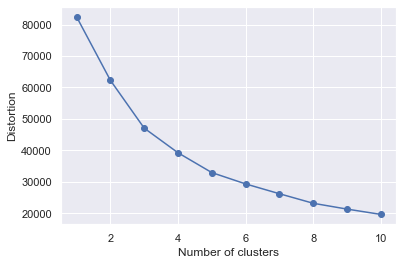

In [18]:
distortions = []

for i  in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(clus_df)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [19]:
km = KMeans(n_clusters=3,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
clusters = km.fit(clus_df)
labels = km.labels_
cleaned_df['clusters']=labels
cleaned_df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,clusters
0,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K,1
1,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K,1
2,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K,1
3,34,Private,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K,2
4,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K,2
...,...,...,...,...,...,...,...,...,...,...,...,...
27486,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K,2
27487,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,2
27488,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,1
27489,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,1


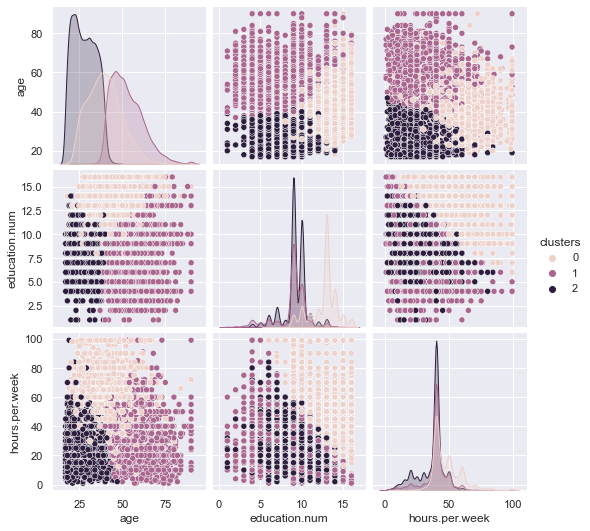

In [20]:
sb.pairplot(cleaned_df,hue='clusters')

In [21]:
cm = sb.light_palette("green", as_cmap=True)
cleaned_df.groupby('clusters').describe().T.style.background_gradient(cmap=cm)

Looking at age, we can categorize the clusters into the following `AgeGroup`:
- 0 : Middle
- 1 : Senior
- 2 : Young

Mean age of each `AgeGroup`
- Young: 28
- Middle: 40
- Senior: 53

Mean education level of each `AgeGroup`
- Young: 9 (High School Grad)
- Middle: 13 (Bachelors)
- Senior: 9 (High School Grad)

Mean working hours per week of each `AgeGroup`
- Young: 36 
- Middle: 48
- Senior: 39 


In [22]:
## Group clusters to AgeGroup
cleaned_df['AgeGroup'] = "No Age band"
cleaned_df.loc[ cleaned_df['clusters'] == 2, 'AgeGroup'] = 'Young'
cleaned_df.loc[ cleaned_df['clusters'] == 0, 'AgeGroup'] = 'Middle'
cleaned_df.loc[ cleaned_df['clusters'] == 1, 'AgeGroup'] = 'Senior'

cleaned_df['AgeGroup'].value_counts()

Young     10990
Middle     8821
Senior     7680
Name: AgeGroup, dtype: int64

In [23]:
# exporting the new dataset into a csv file
file_path = "./dataset_AgeGroup.csv"
cleaned_df.to_csv(path_or_buf=file_path, index=False);

---

## Exploratory Data Analysis

### Retrieving cleaned dataset for Exploratory Analysis

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
We conduct exploration on the data.

In [24]:
data = pd.read_csv('dataset_AgeGroup.csv')
data

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,clusters,AgeGroup
0,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K,1,Senior
1,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K,1,Senior
2,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K,1,Senior
3,34,Private,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K,2,Young
4,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K,2,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27486,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K,2,Young
27487,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,2,Young
27488,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,1,Senior
27489,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,1,Senior


### Combining numeric values into a dataframe


In [25]:
numData = pd.DataFrame(data[['age', 'education.num', 'hours.per.week']])
numData

,age,education.num,hours.per.week
0,82,9,18
1,54,4,40
2,41,10,40
3,34,9,45
4,38,6,40
...,...,...,...
27486,22,10,40
27487,27,12,38
27488,40,9,40
27489,58,9,40


In [26]:
numData.describe()

,age,education.num,hours.per.week
count,27491.000000,27491.000000,27491.000000
mean,38.500600,10.222691,40.974137
std,13.178963,2.378978,12.037876
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


### Visualising the distribution of numeric variables


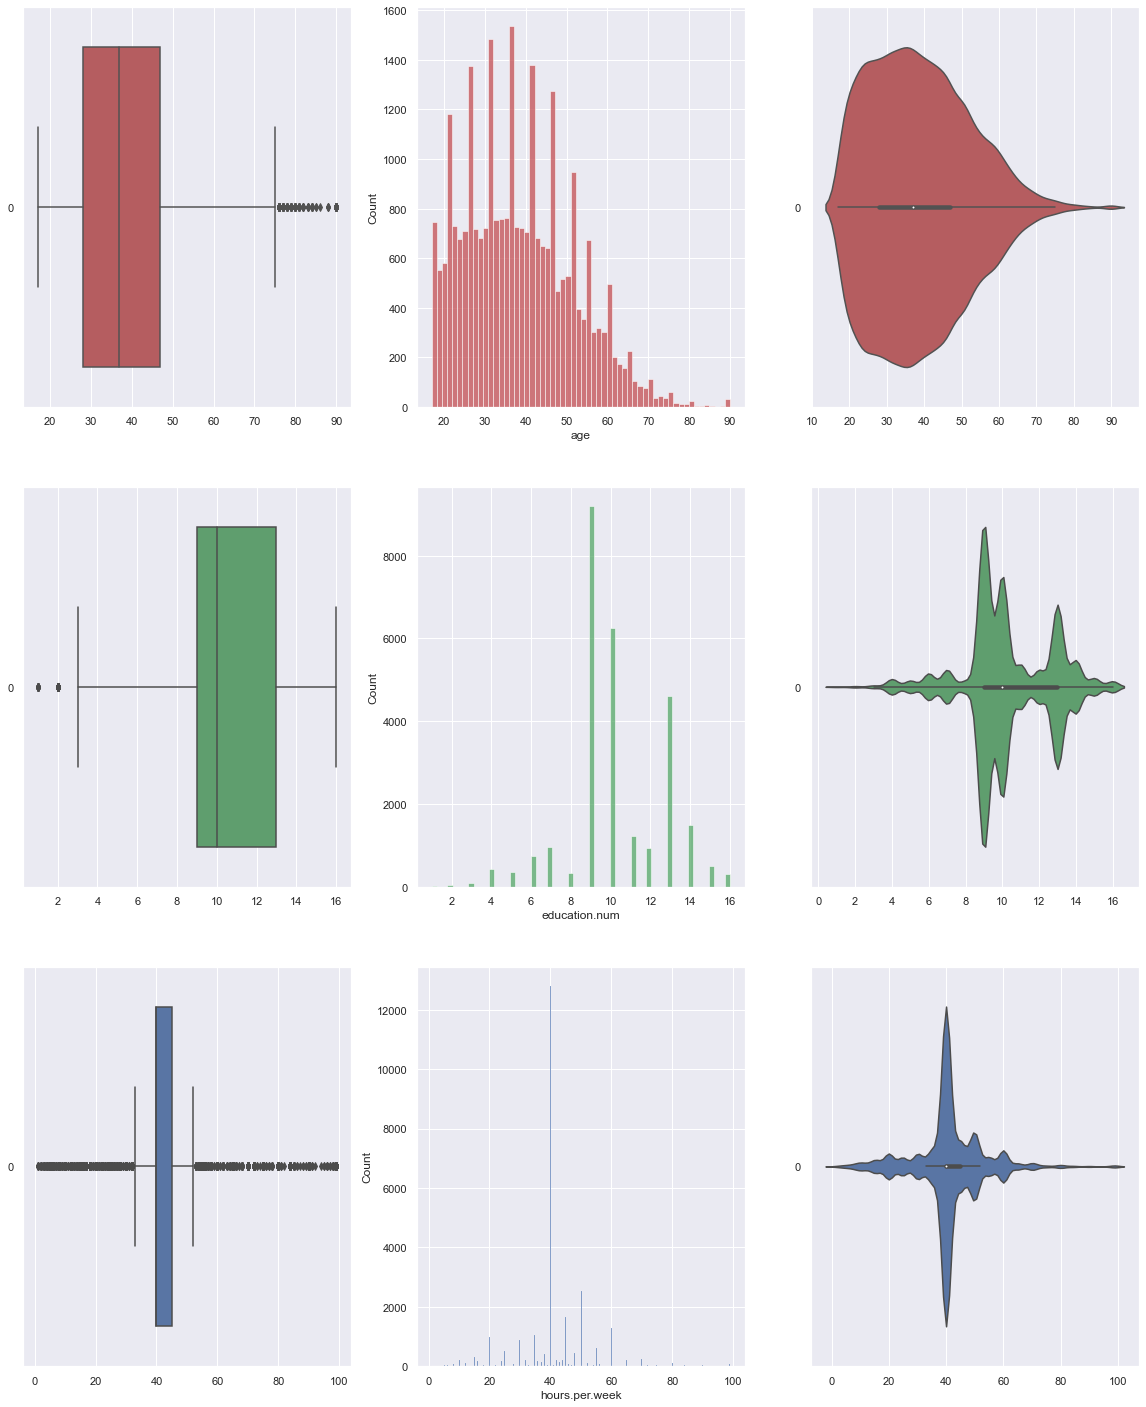

In [27]:
# Draw the distributions of numeric variables
f, axes = plt.subplots(3, 3, figsize=(20, 25))
colors = ["r", "g", "b", "m", "c"]

count = 0
for var in numData:
    sb.boxplot(data=numData[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=numData[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data=numData[var], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

### Comparing numeric variables against `income`


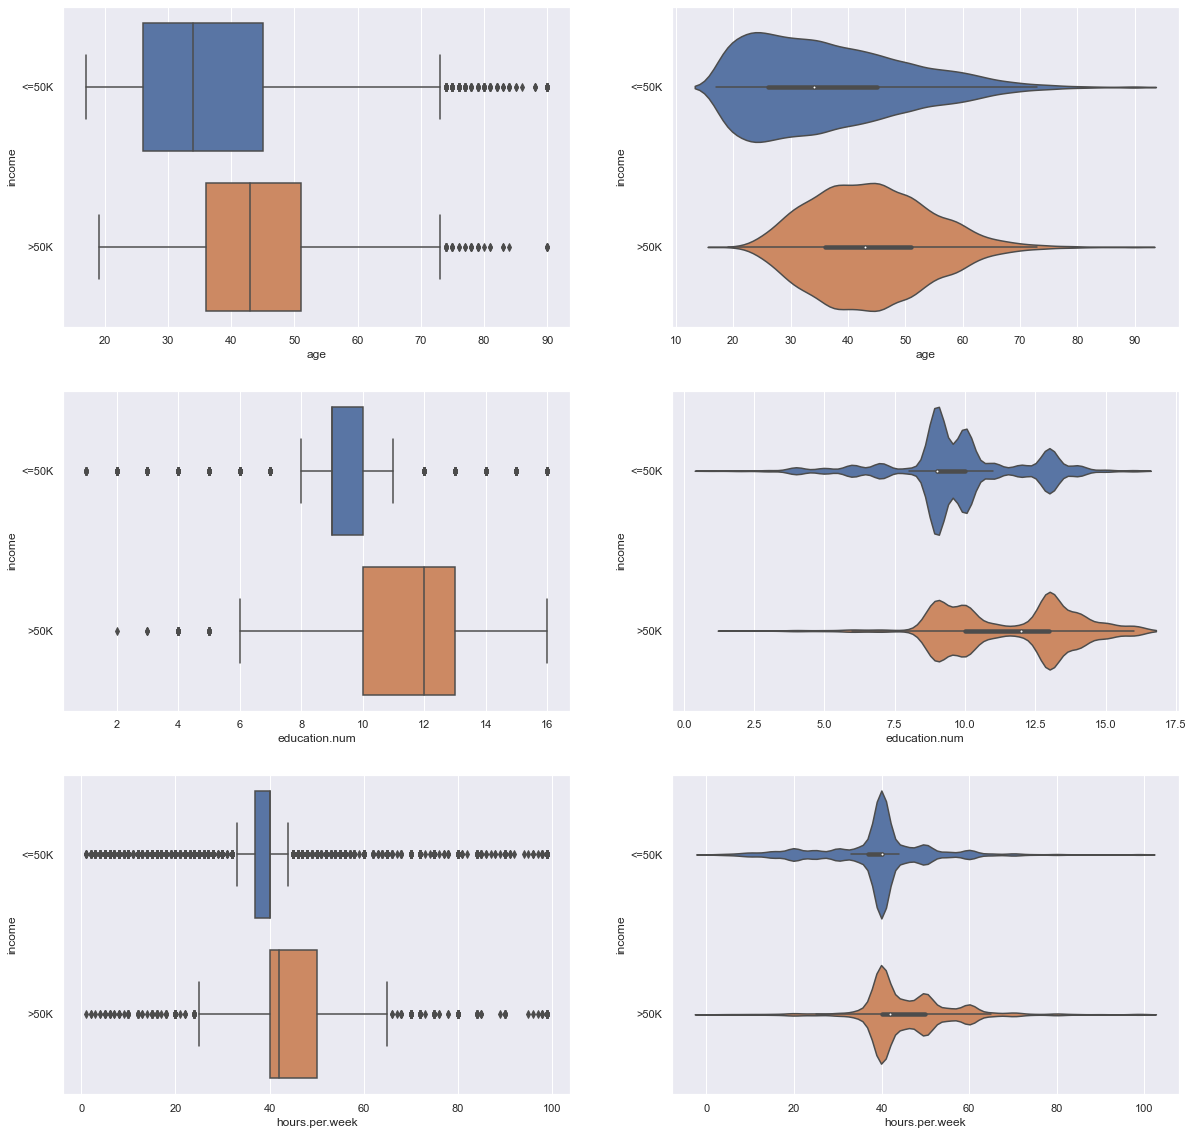

In [28]:
#numeric vs income
f, axes = plt.subplots(3, 2,figsize=(20, 20))

count = 0
for var in numData:
    sb.boxplot(x=numData[var], y= 'income', data=data, ax = axes[count,0])
    sb.violinplot(x=numData[var], y= 'income', data=data, ax = axes[count,1])
    count += 1

### Which variables will help us predict `income` in this dataset?

- `education.num` and `hours.per.week`: High variation in `income` across the levels (most important)
- `age`: Medium variation in `income` across levels (moderately important)


### Combining categorical values into a dataframe


In [29]:
catData = pd.DataFrame(data[['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'AgeGroup']])

### Visualising the distribution of categorical variables


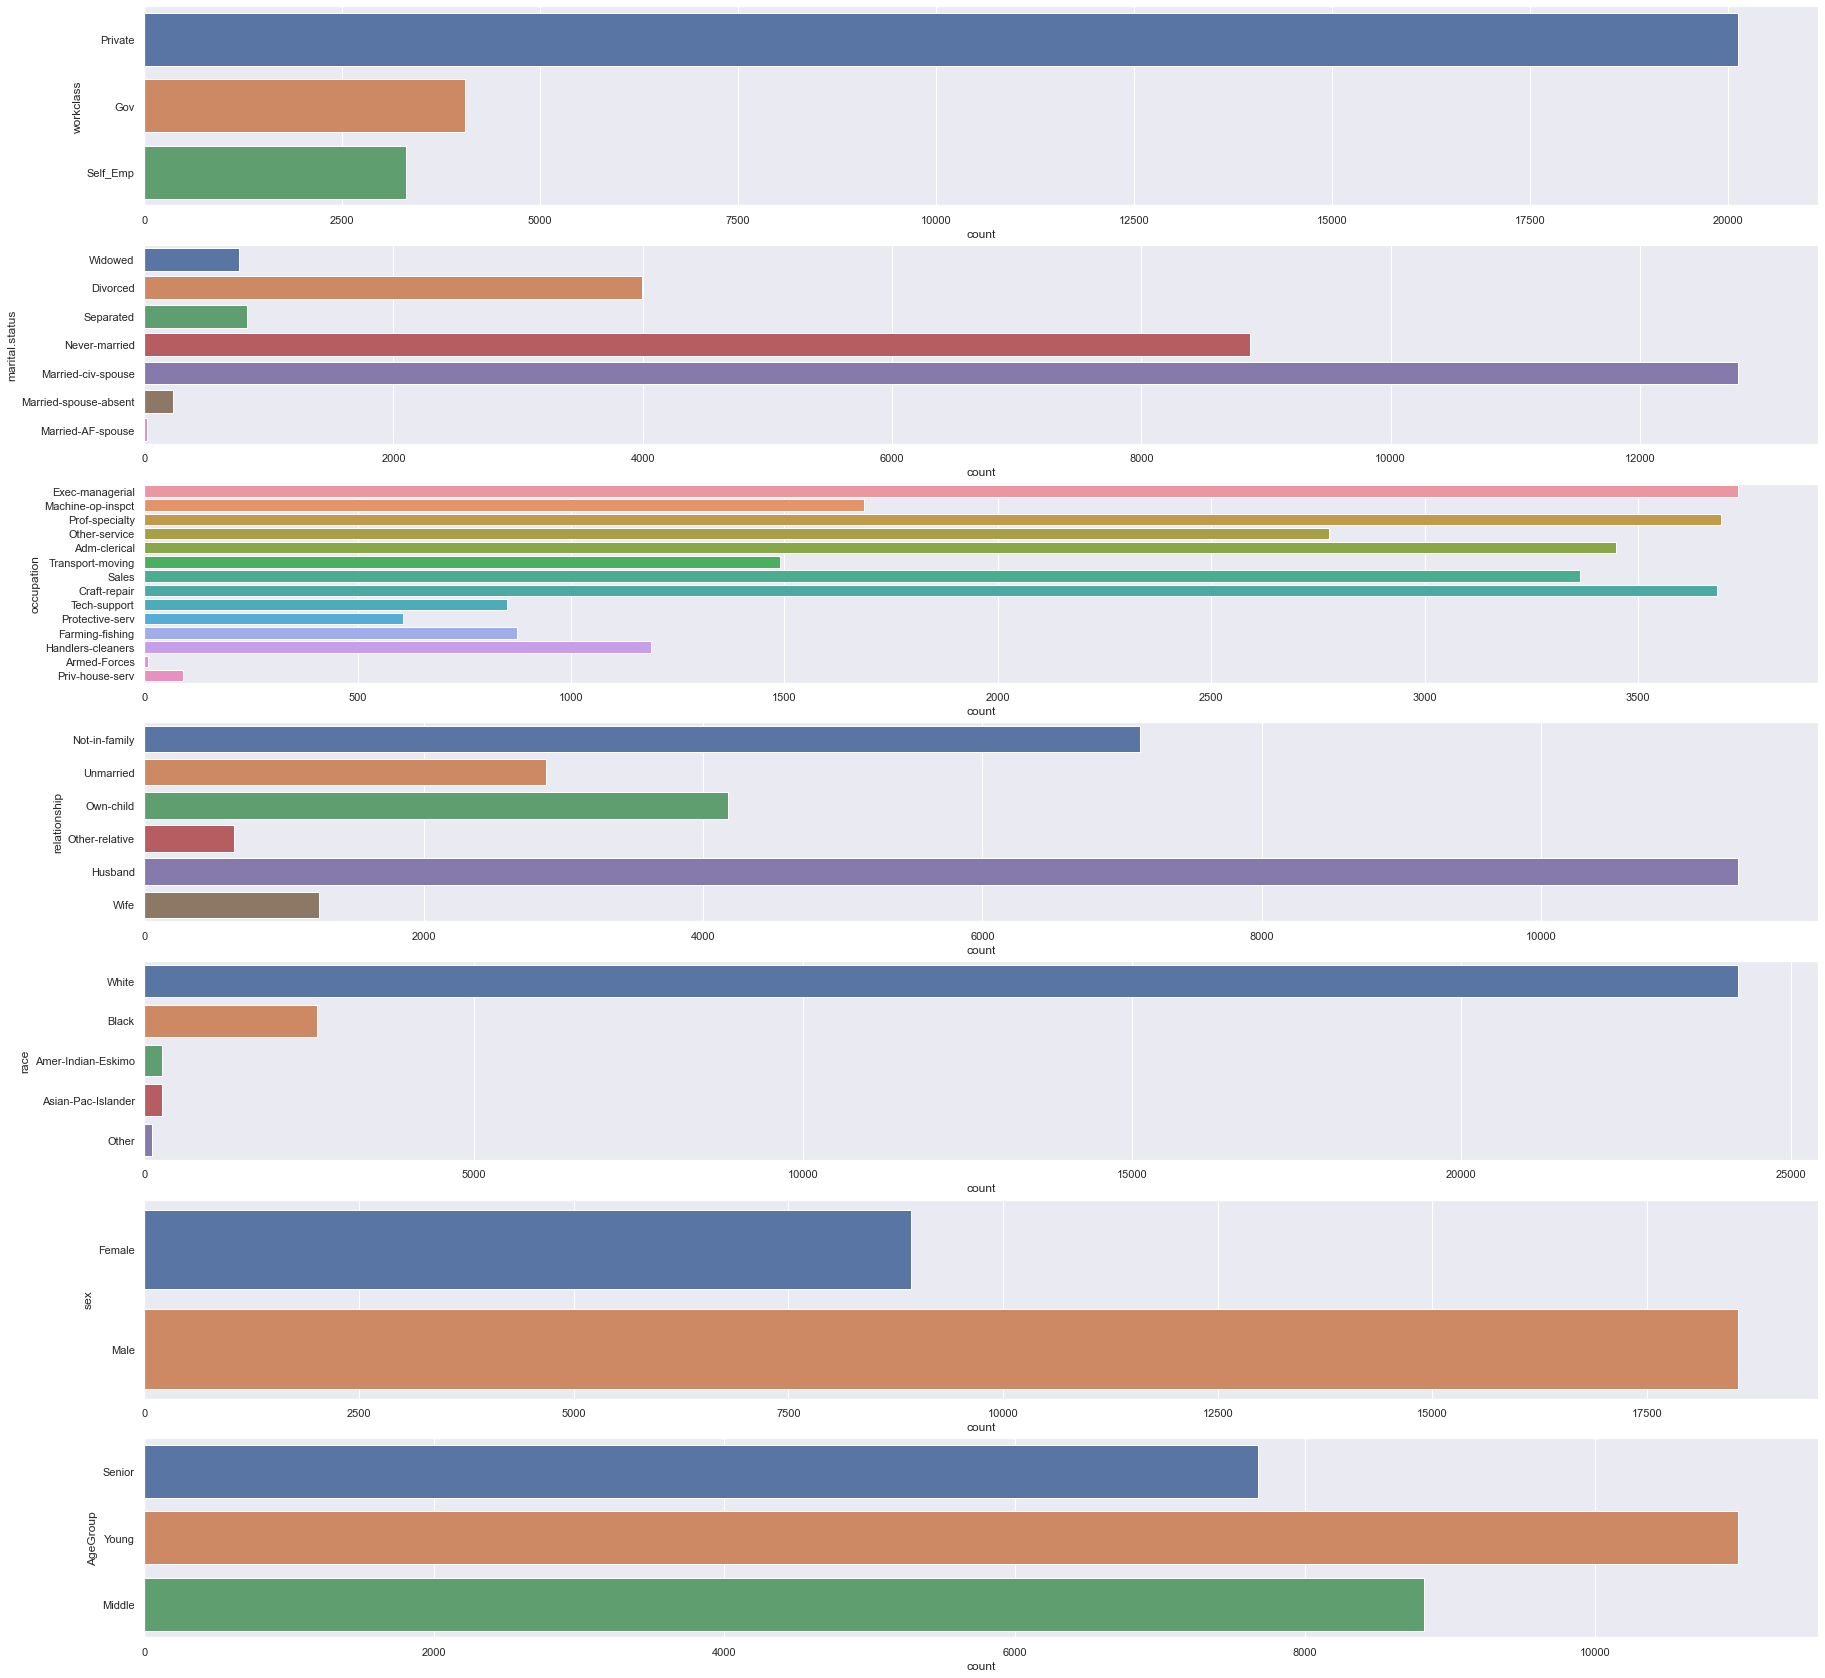

In [30]:
#distribution of variables
f, axes = plt.subplots(7, 1,figsize=(30, 30))
colors = ["r", "g", "b", "m", "c"]

count = 0
for var in catData:
    sb.countplot(y=catData[var], data=catData[var], ax = axes[count])
    count += 1

<AxesSubplot:xlabel='workclass', ylabel='income'>

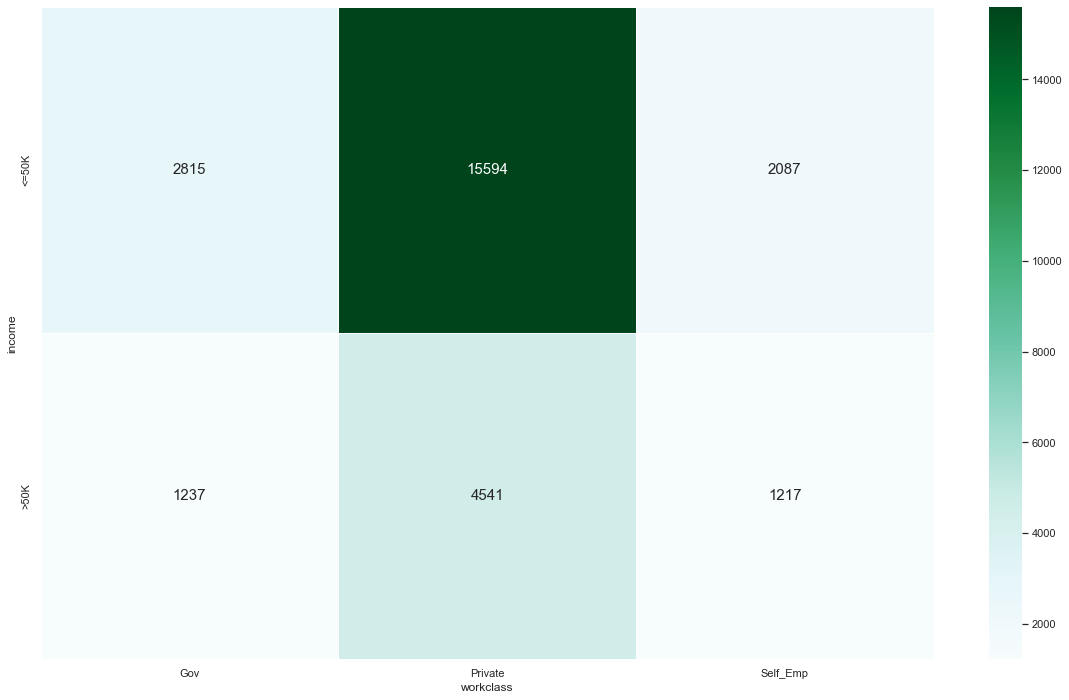

In [31]:
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.heatmap(data.groupby(['income','workclass']).size().unstack(),
           linewidths = 1, annot = True,fmt='g', annot_kws = {"size": 15}, cmap = "BuGn")

<AxesSubplot:xlabel='marital.status', ylabel='income'>

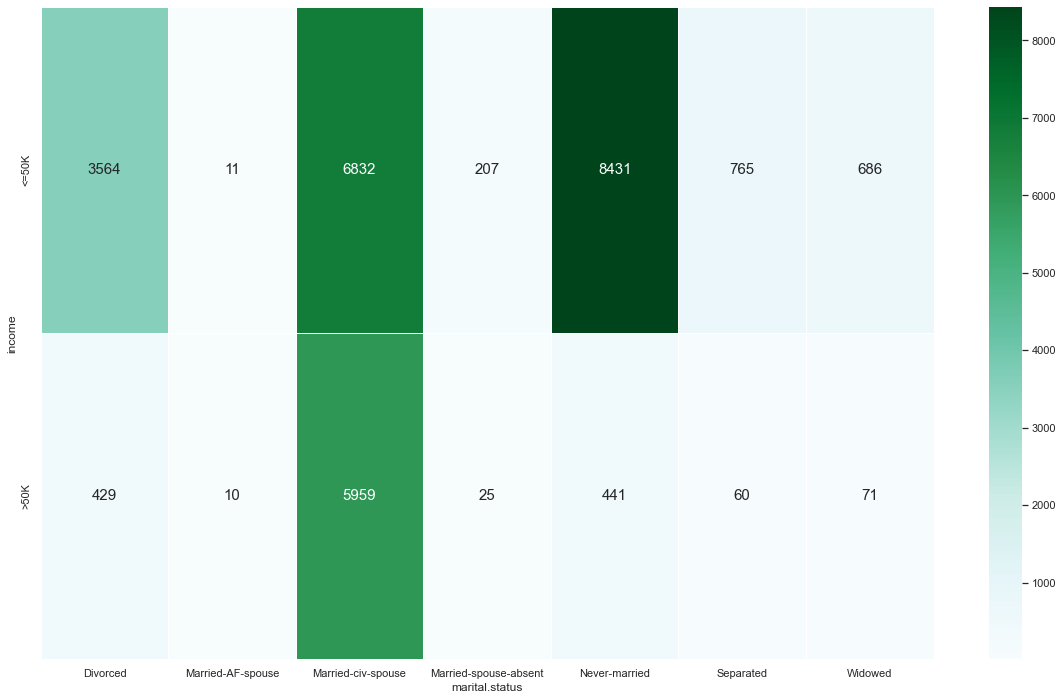

In [32]:
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.heatmap(data.groupby(['income','marital.status']).size().unstack(),
           linewidths = 1, annot = True,fmt='g', annot_kws = {"size": 15}, cmap = "BuGn")

<AxesSubplot:xlabel='occupation', ylabel='income'>

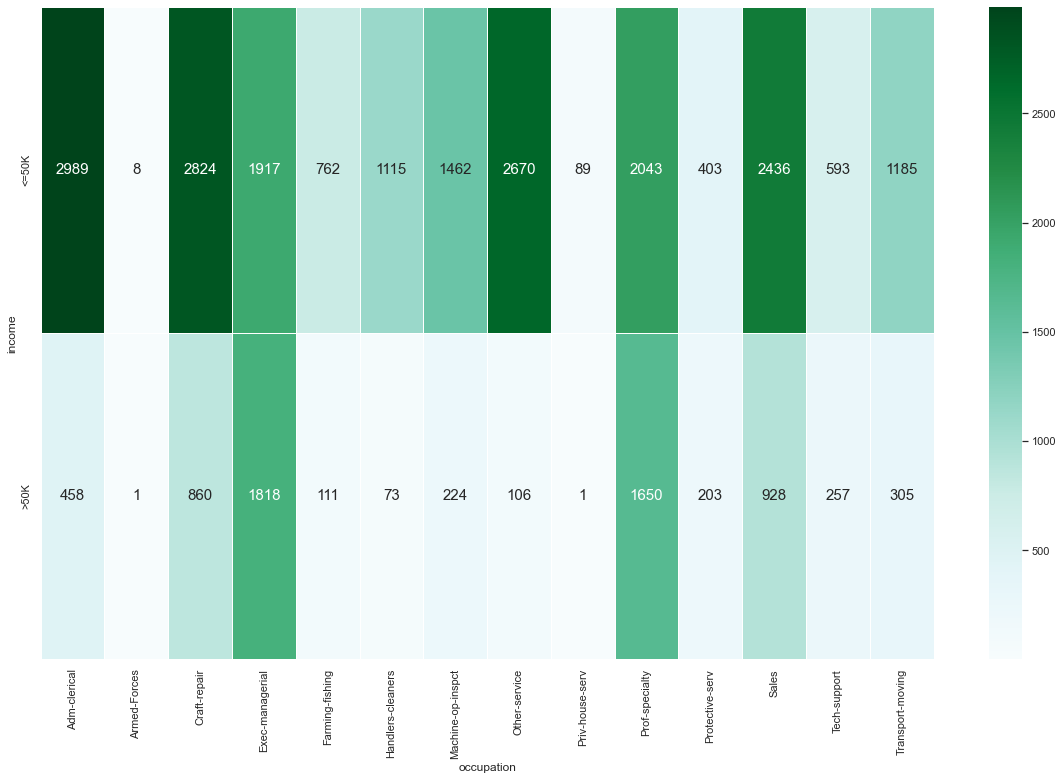

In [33]:
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.heatmap(data.groupby(['income','occupation']).size().unstack(),
           linewidths = 1, annot = True,fmt='g', annot_kws = {"size": 15}, cmap = "BuGn")

<AxesSubplot:xlabel='relationship', ylabel='income'>

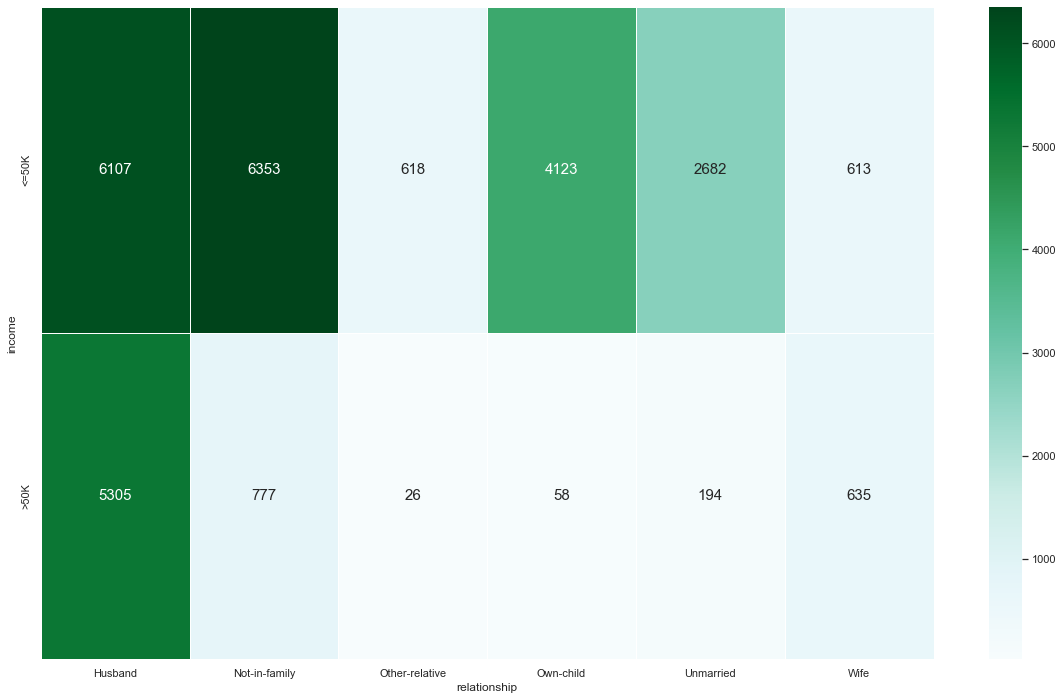

In [34]:
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.heatmap(data.groupby(['income','relationship']).size().unstack(),
           linewidths = 1, annot = True,fmt='g', annot_kws = {"size": 15}, cmap = "BuGn")

<AxesSubplot:xlabel='race', ylabel='income'>

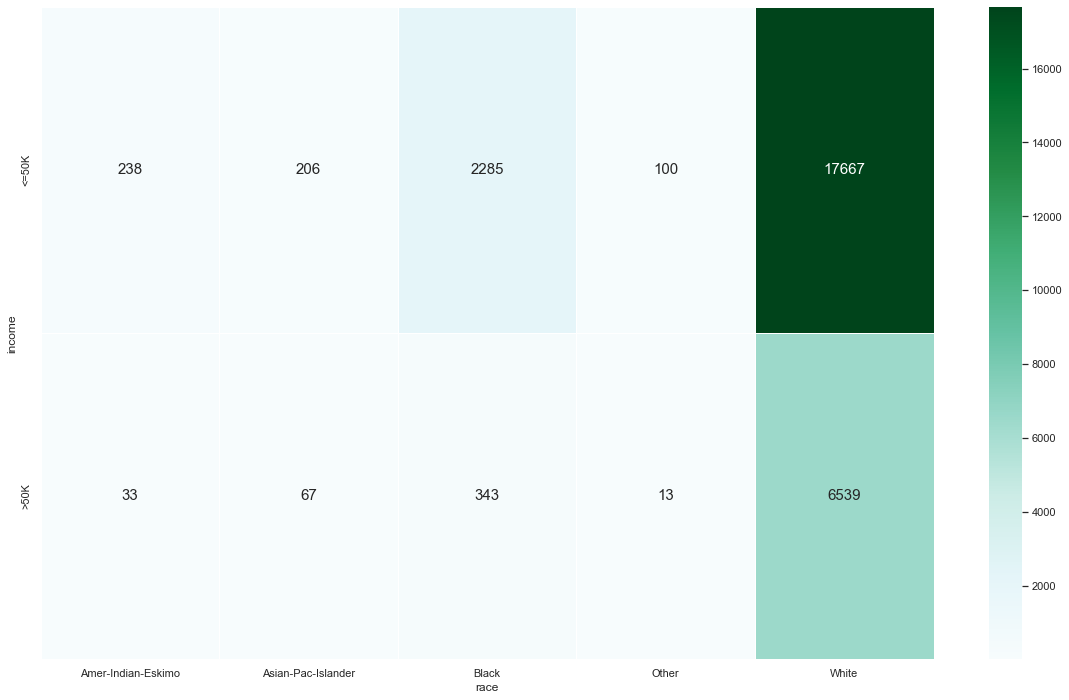

In [35]:
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.heatmap(data.groupby(['income','race']).size().unstack(),
           linewidths = 1, annot = True,fmt='g', annot_kws = {"size": 15}, cmap = "BuGn")

<AxesSubplot:xlabel='sex', ylabel='income'>

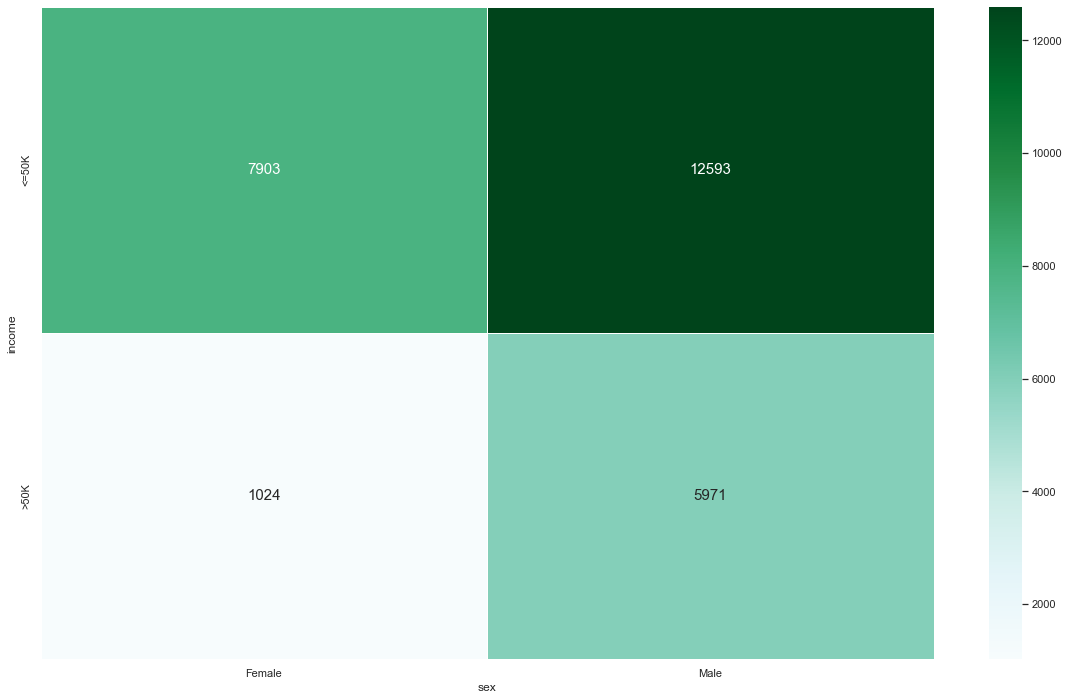

In [36]:
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.heatmap(data.groupby(['income','sex']).size().unstack(),
           linewidths = 1, annot = True,fmt='g', annot_kws = {"size": 15}, cmap = "BuGn")

<AxesSubplot:xlabel='AgeGroup', ylabel='income'>

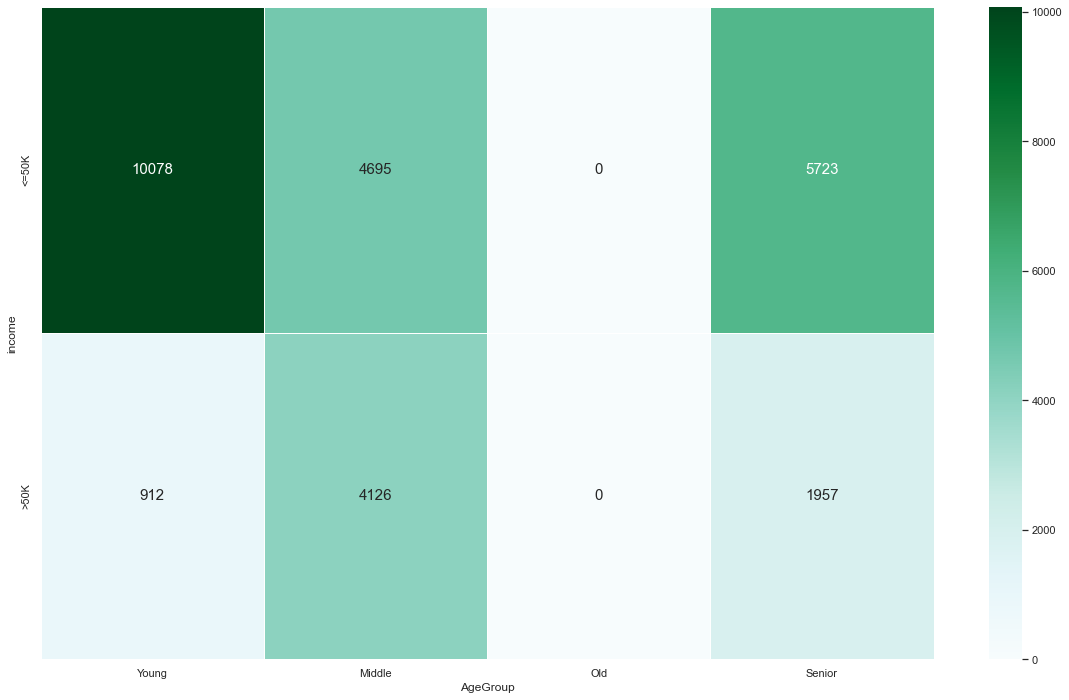

In [37]:
data['AgeGroup'] = pd.Categorical(data['AgeGroup'], categories=['Young', 'Middle', 'Old', 'Senior'])
f, axes = plt.subplots(1, 1, figsize=(20, 12))
sb.heatmap(data.groupby(['income','AgeGroup']).size().unstack(),
           linewidths = 1, annot = True,fmt='g', annot_kws = {"size": 15}, cmap = "BuGn")

Through these heatmaps, we are able to see some distinct correlations between the different variables when compared with income.

However, using heatmaps for visualization does not give us much information for a substantial conclusion. Hence, we will use nominal associations from Dython library.


## Dython Nominal Association

Dython is a set of data analysis tools in python 3.x, which allows us to get more insights into our data. This library was designed with analysis usage in mind. Ease-of-use, functionality, and readability are the core values of this library. Dython utilises multiple measures of association such as Pearson's R, Cramer's V and Theil's U to effectively compute correlation values.

Dython will compute a relevant measure of association between each and every feature, and plot it all as an easy-to-read heat-map. It is one of the popular feature selection techniques that can be used for categorical input data and a categorical target variable. Using Dyton Nominal Association, we can obtain a tangible correlation value between the categorical variables and `income`.


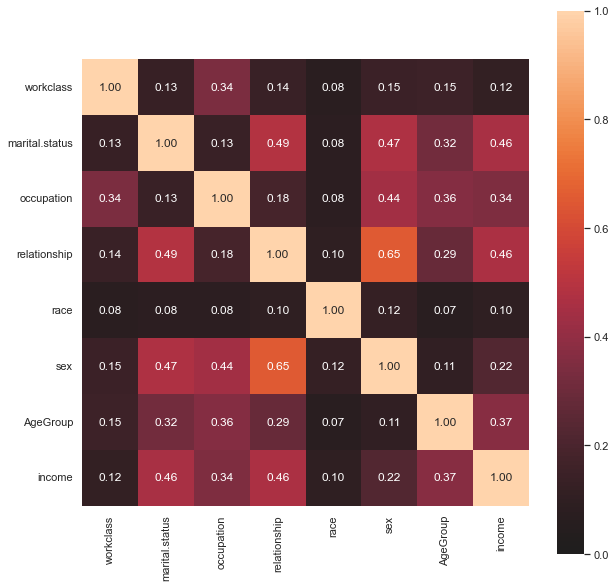

{'corr':                 workclass  marital.status  occupation  relationship      race  \
 workclass        1.000000        0.129067    0.336149      0.137558  0.075941   
 marital.status   0.129067        1.000000    0.134136      0.489599  0.082940   
 occupation       0.336149        0.134136    1.000000      0.181727  0.080880   
 relationship     0.137558        0.489599    0.181727      1.000000  0.098675   
 race             0.075941        0.082940    0.080880      0.098675  1.000000   
 sex              0.147326        0.471177    0.439701      0.650952  0.122994   
 AgeGroup         0.151668        0.317550    0.360009      0.288180  0.068586   
 income           0.115684        0.455425    0.344266      0.460940  0.100386   
 
                      sex  AgeGroup    income  
 workclass       0.147326  0.151668  0.115684  
 marital.status  0.471177  0.317550  0.455425  
 occupation      0.439701  0.360009  0.344266  
 relationship    0.650952  0.288180  0.460940  
 race       

In [38]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

dython_add = data['income']
dython_data = catData.assign(income=dython_add)
associations(dython_data, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', ax=None, figsize=(10,10), annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None, filename=None)

Dython is a much better alternative to visualise the correlation between categorical variables and income, since we are able to obtain correlation values, with 0 being no correlation and 1 being perfect correlation. 

As seen from the heatmap, it seems that `marital.status` and `relationship` has the highest correlation with income, at 0.46, followed by `AgeGroup` at 0.37 and `occupation` at 0.34. 

It seems that these 4 variables are most likely to give us a better accuracy when the variables are put into the machine learning models.

---

## Logistic Regression

### Predicting `income` using `age`

Response Variable : `income`   
Predictor Feature : `age` 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='income', ylabel='age'>

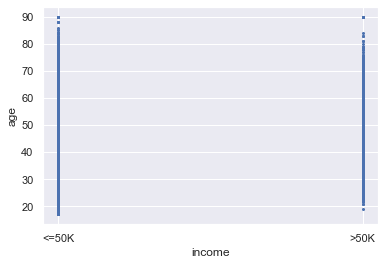

In [39]:
age = pd.DataFrame(data['age'])
income = pd.DataFrame(data['income'])

# Create a scatter plot
data.plot.scatter(x = 'income', y = 'age', s = 4)

In [40]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the Dataset into Train and Test
age_train, age_test, income_train, income_test = train_test_split(age, income, random_state =1)

# Create a Logistical Regression object
logreg = LogisticRegression()

# Train the Logistical Regression model
logreg.fit(age_train, income_train)

# Show to Coeficient and Intercept
print(logreg.coef_)
print(logreg.intercept_)

[[0.04215331]]
[-2.77022323]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
# Perform prediction using the test dataset
income_pred = logreg.predict(age_test)
print(income_pred)

['<=50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '<=50K']


In [42]:
from sklearn.metrics import classification_report
# Show the classfication report
print(classification_report(income_test, income_pred))

# Show the Confusion Matrix
confusion_matrix(income_test, income_pred)

              precision    recall  f1-score   support

       <=50K       0.74      0.97      0.84      5122
        >50K       0.25      0.03      0.05      1751

    accuracy                           0.73      6873
   macro avg       0.50      0.50      0.45      6873
weighted avg       0.62      0.73      0.64      6873



array([[4968,  154],
       [1701,   50]], dtype=int64)

From the above array, the result tells us that we have 4968 + 154 = 5122 correct predictions and 1701 + 50 = 1751 incorrect predictions.

In general, if working with an imbalanced dataset where all classes are equally important, using the macro average would be a good choice as it treats all classes equally. This means that for our example involving classification, we would use the macro-F1 score.

If there is an imbalanced dataset but assigning greater contribution to classes with more examples in the dataset is preferred, then the weighted average should be utilised. This is because in weighted averaging, the contribution of each class to the F1 average is weighted by its size.

Suppose there is a balanced dataset and an easily understandable metric for overall performance regardless of the class is wanted, we can go with accuracy, which is essentially our micro F1 score.

From the above, we will hence use the accuracy, F1-score. Therefore, from the classification report of the entire test set, we can conclude that the accuracy of the logistical regression is at 0.73 out of 1.0 which is relatively accurate. Whether or not it is the best singular predictor to predict income, it would be further discussed in the later segment.

### Predicting `income` using `education.num`

Response Variable : `income`   
Predictor Feature : `education.num` 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='income', ylabel='education.num'>

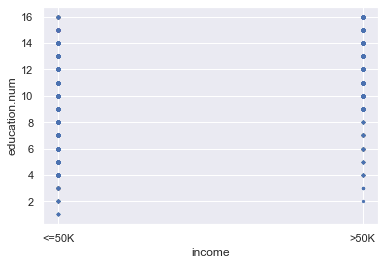

In [43]:
education = pd.DataFrame(data['education.num'])
income = pd.DataFrame(data['income'])

# Create a scatter plot
data.plot.scatter(x = 'income', y = 'education.num', s = 5)

In [44]:
# Split the Dataset into Train and Test
education_train, education_test, income_train, income_test = train_test_split(education, income, random_state =1)

# Create a Logistical Regression object
logreg = LogisticRegression()

# Train the Logistical Regression model
logreg.fit(education_train, income_train)

# Show to Coeficient and Intercept
print(logreg.coef_)
print(logreg.intercept_)

[[0.36373399]]
[-4.96038958]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
# Perform prediction using the test dataset
income_pred = logreg.predict(education_test)
print(income_pred)

['<=50K' '<=50K' '<=50K' ... '<=50K' '>50K' '<=50K']


In [46]:
# Show the classfication report
print(classification_report(income_test, income_pred))

# Show the Confusion Matrix
confusion_matrix(income_test, income_pred)

              precision    recall  f1-score   support

       <=50K       0.78      0.96      0.86      5122
        >50K       0.65      0.21      0.32      1751

    accuracy                           0.77      6873
   macro avg       0.72      0.59      0.59      6873
weighted avg       0.75      0.77      0.72      6873



array([[4928,  194],
       [1383,  368]], dtype=int64)

From the above array, the result tells us that we have 4928 + 194 = 5122 correct predictions and 1383 + 368 = 1751 incorrect predictions.

Similar to "age" vs "income", will also use the accuracy, F1-score as a comparison. Therefore, from the classification report, of the entire test set, we can conclude that the accuracy of the logistical regression is at 0.77 out of 1.0 which is realtively accurate than the previous factor of age. Wether or not it is the best singular predictor to predict income would be further compared in the later part.

### Predicting `income` using `hours.per.week`

Response Variable : `income`   
Predictor Feature : `hours.per.week` 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='income', ylabel='hours.per.week'>

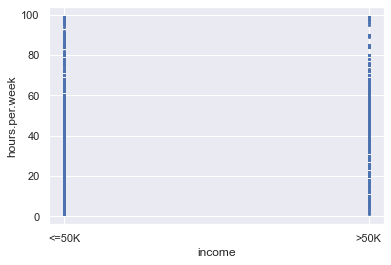

In [47]:
hours = pd.DataFrame(data['hours.per.week'])
income = pd.DataFrame(data['income'])

# Create a scatter plot
data.plot.scatter(x = 'income', y = 'hours.per.week', s = 4)

In [48]:
# Split the Dataset into Train and Test
hours_train, hours_test, income_train, income_test = train_test_split(hours, income, random_state =1)

# Create a Logistical Regression object
logreg = LogisticRegression()

# Train the Logistical Regression model
logreg.fit(hours_train, income_train)

# Show to Coeficient and Intercept
print(logreg.coef_)
print(logreg.intercept_)

[[0.0461062]]
[-3.02931065]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
# Perform prediction using the test dataset
income_pred = logreg.predict(hours_test)
print(income_pred)

['<=50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '<=50K']


In [50]:
# Show the classfication report
print(classification_report(income_test, income_pred))

# Show the Confusion Matrix
confusion_matrix(income_test, income_pred)

              precision    recall  f1-score   support

       <=50K       0.75      0.98      0.85      5122
        >50K       0.39      0.04      0.07      1751

    accuracy                           0.74      6873
   macro avg       0.57      0.51      0.46      6873
weighted avg       0.66      0.74      0.65      6873



array([[5013,  109],
       [1681,   70]], dtype=int64)

From the above array, the result tells us that we have 5013 + 109 = 5122 correct predictions and 1681 + 70 = 1751 incorrect predictions.

Similarly, we will also be using accuracy, F1-score as a comparison. Therefore, from the classification report, of the entire test set, we can conclude that the accuracy of the logistical regression is at 0.74 out of 1.0 which is more accurate than age but less accurate than education. 

### Conclusion

The micro f1 scores of the predictors are as follows:
- `age`: 0.73
- `education.num`: 0.77
- `hours.per.week`: 0.74 

Therefore, we can conclude that out of all the numerical predictors, education will be the most accurate followed by hours per week, and finally age. 

---

## Uni-variate Decision Tree


In [51]:
data["income"].value_counts()

<=50K    20496
>50K      6995
Name: income, dtype: int64

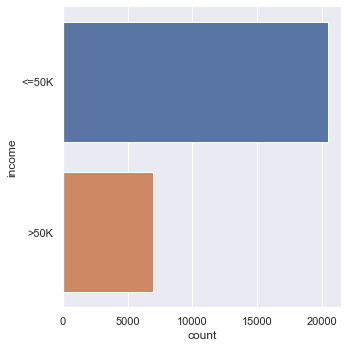

In [52]:
sb.catplot(y = "income", data = data, kind = "count")

### Predicting `income` using `age`

Response Variable : `income`   
Predictor Feature : `age` 

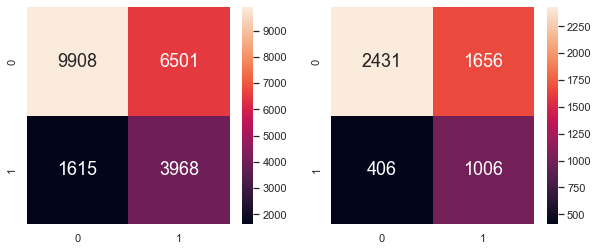

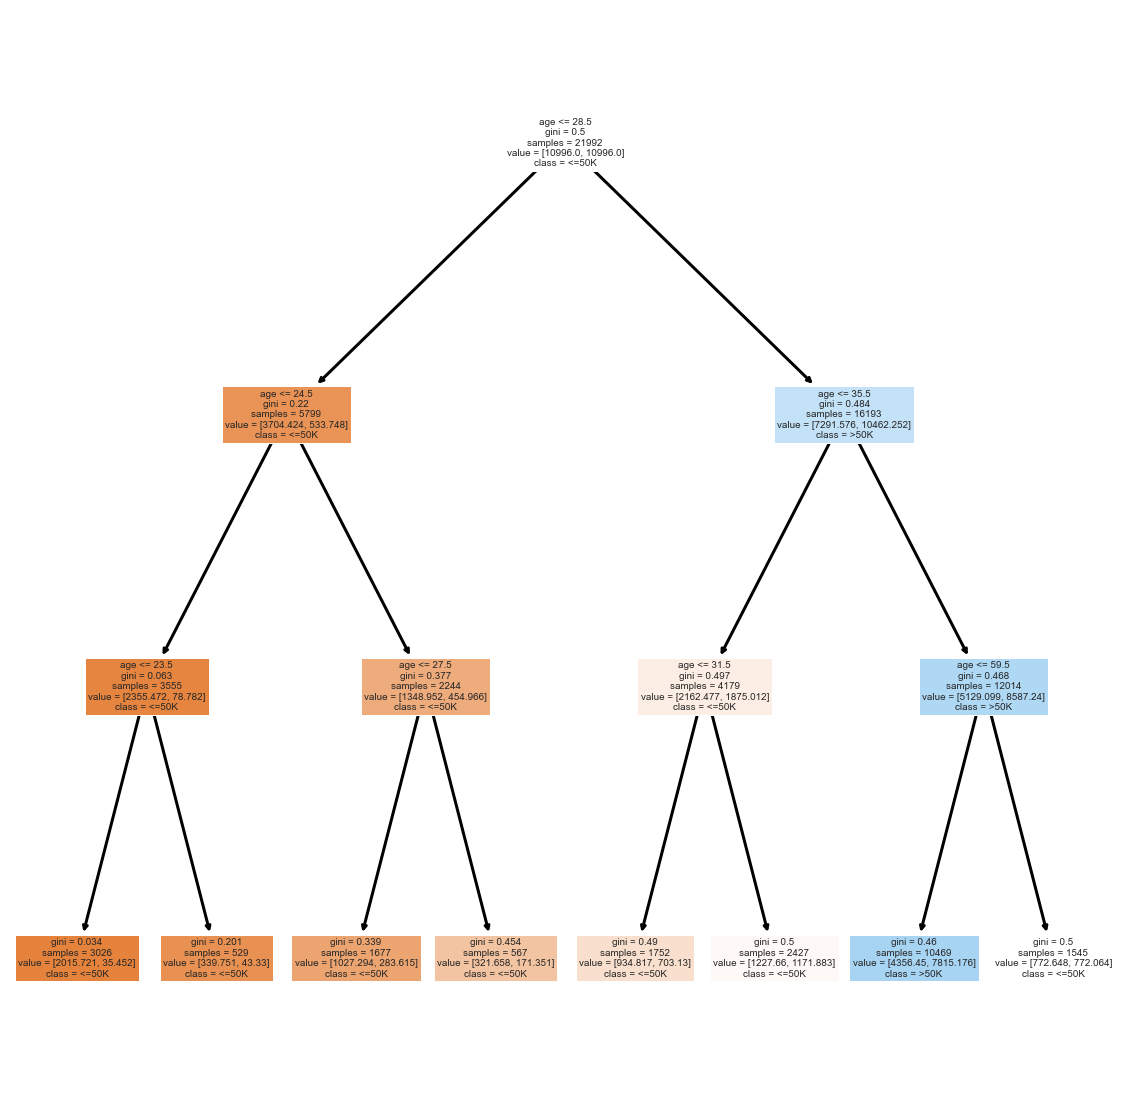

In [53]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import itertools

# Extract Response and Predictors
y = pd.DataFrame(data['income'])  # Response
X = pd.DataFrame(data['age'])    # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3, class_weight='balanced')  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(10, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 20))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

In [54]:
# Check the Goodness of Fit (on Train Data)
CM_train = confusion_matrix(y_train, y_train_pred)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("Classification Report\n", classification_report(y_train, y_train_pred))

# Check the Goodness of Fit (on Test Data)
CM_test = confusion_matrix(y_test, y_test_pred)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("Classification Report\n", classification_report(y_test, y_test_pred))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.630956711531466
Classification Report
               precision    recall  f1-score   support

       <=50K       0.86      0.60      0.71     16409
        >50K       0.38      0.71      0.49      5583

    accuracy                           0.63     21992
   macro avg       0.62      0.66      0.60     21992
weighted avg       0.74      0.63      0.65     21992

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6250227314057101
Classification Report
               precision    recall  f1-score   support

       <=50K       0.86      0.59      0.70      4087
        >50K       0.38      0.71      0.49      1412

    accuracy                           0.63      5499
   macro avg       0.62      0.65      0.60      5499
weighted avg       0.73      0.63      0.65      5499



#### Understanding Classification Accuracy
Classification Accuracy is measured by (Number of correct predictions) / (Total number of predictions)

#### Understanding Decision Tree and Confusion Matrix
The darker the colour of the box, the more important the predictor is in predicting the response. The lower the gini index, the more accurate the predictor is in predicting the response. Thus, we should look for predictors with dark colours and low gini indexes.

We obtained a classification accuracy of 0.624 for prediction of `income` using `age`.

### Predicting `income` using `education.num`

Response Variable : `income`   
Predictor Feature : `education.num`


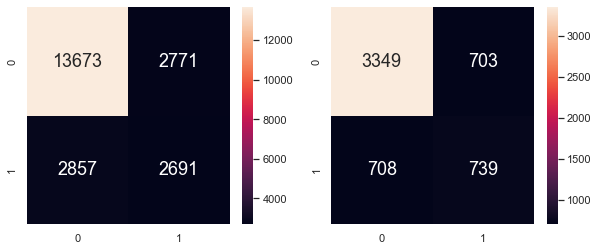

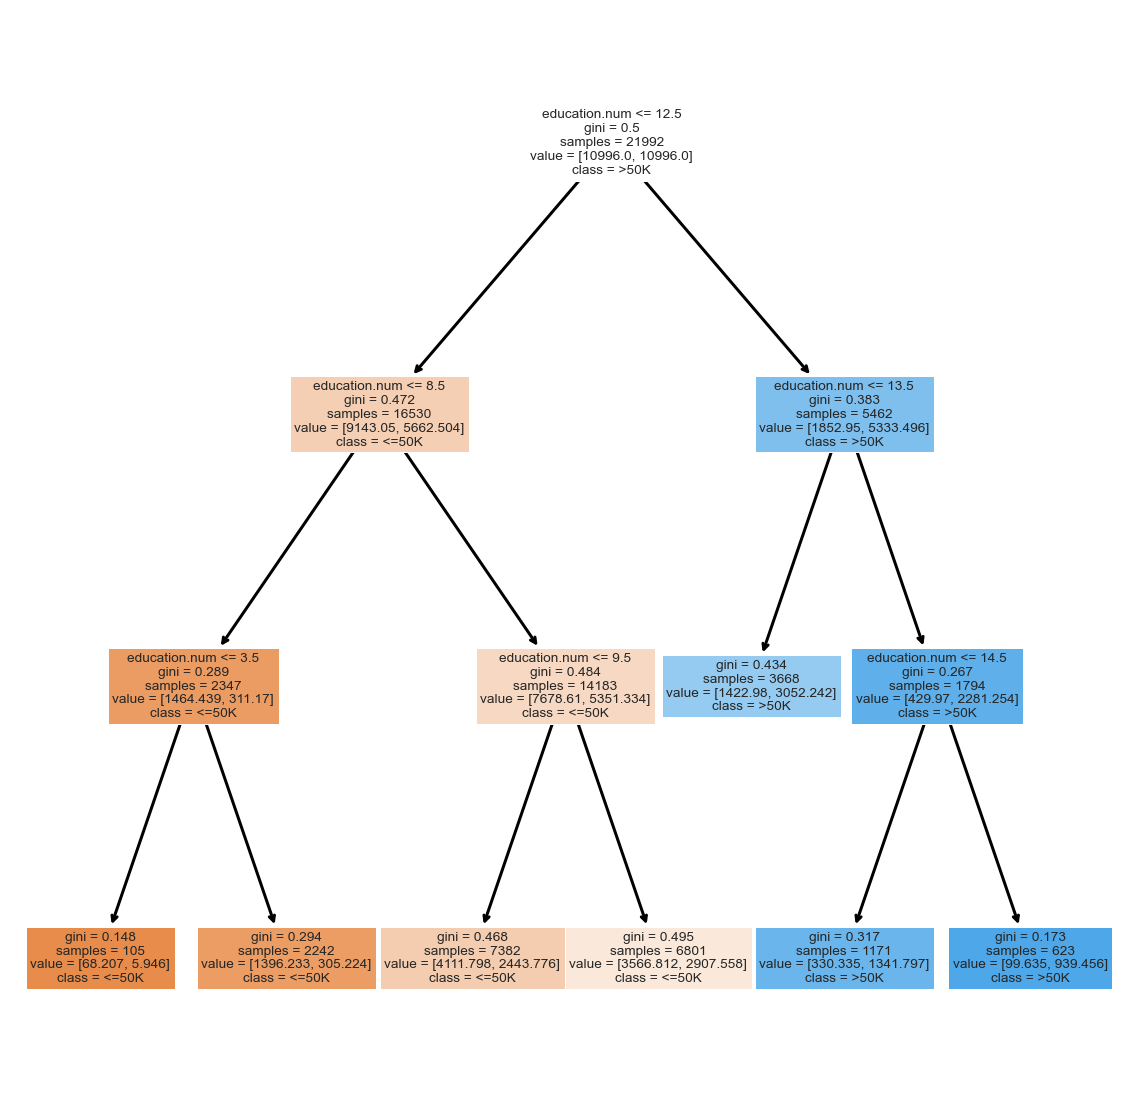

In [55]:
# Extract Response and Predictors
y = pd.DataFrame(data['income'])  # Response
X = pd.DataFrame(data['education.num'])    # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3, class_weight='balanced')  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(10, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
fig, ax = plt.subplots(figsize=(20, 20))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

In [56]:
# Check the Goodness of Fit (on Train Data)
CM_train = confusion_matrix(y_train, y_train_pred)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("Classification Report\n", classification_report(y_train, y_train_pred))

# Check the Goodness of Fit (on Test Data)
CM_test = confusion_matrix(y_test, y_test_pred)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("Classification Report\n", classification_report(y_test, y_test_pred))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7440887595489268
Classification Report
               precision    recall  f1-score   support

       <=50K       0.83      0.83      0.83     16444
        >50K       0.49      0.49      0.49      5548

    accuracy                           0.74     21992
   macro avg       0.66      0.66      0.66     21992
weighted avg       0.74      0.74      0.74     21992

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7434078923440626
Classification Report
               precision    recall  f1-score   support

       <=50K       0.83      0.83      0.83      4052
        >50K       0.51      0.51      0.51      1447

    accuracy                           0.74      5499
   macro avg       0.67      0.67      0.67      5499
weighted avg       0.74      0.74      0.74      5499



We obtained a classification accuracy of 0.704 for prediction of `income` using `education.num`.

### Predicting `income` using `hours.per.week`

Response Variable : `income`   
Predictor Feature : `hours.per.week`


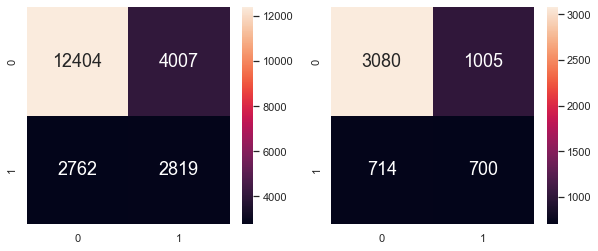

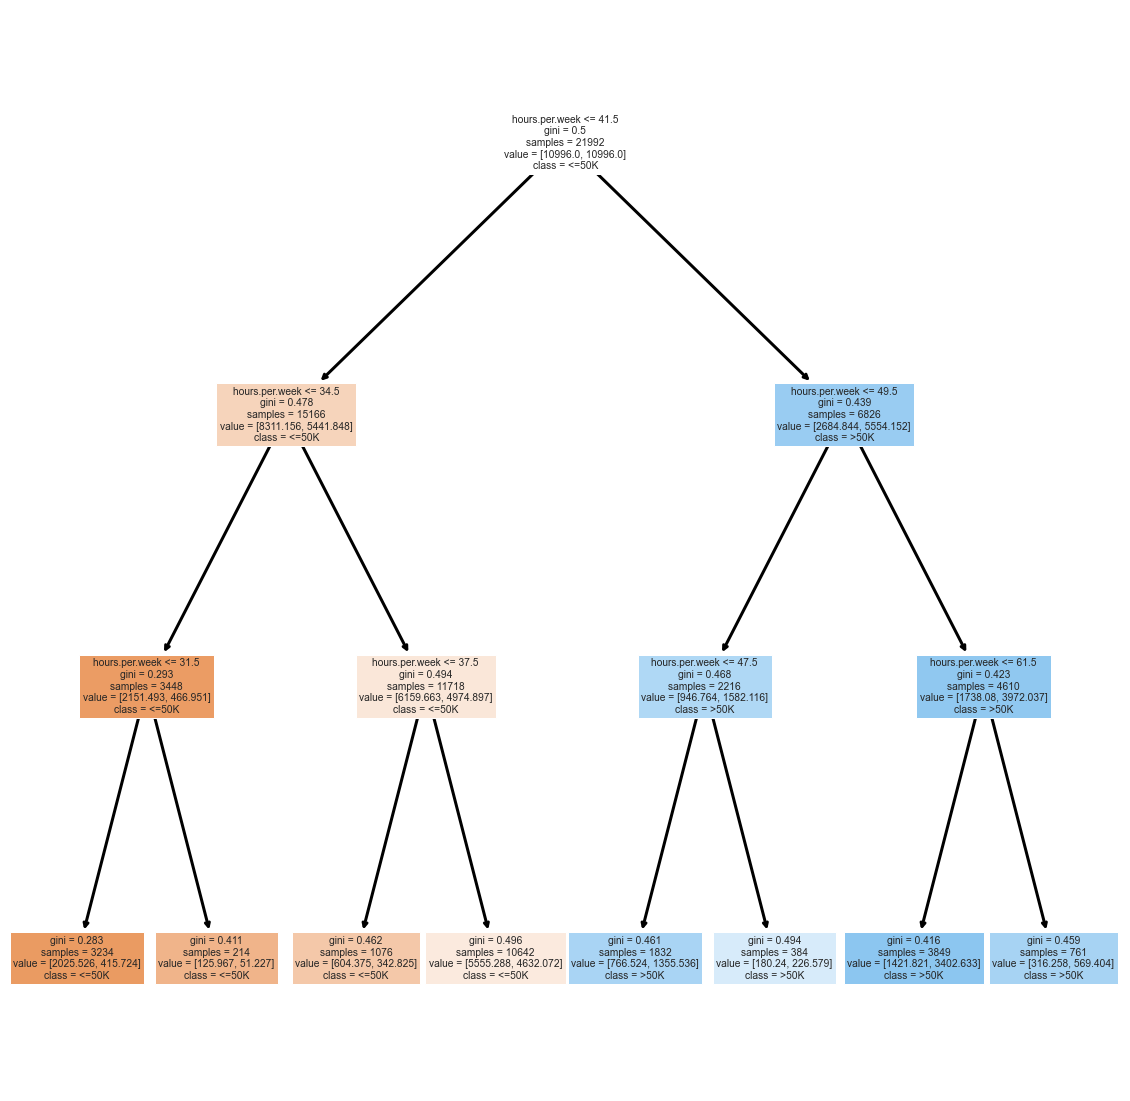

In [57]:
# Extract Response and Predictors
y = pd.DataFrame(data['income'])  # Response
X = pd.DataFrame(data['hours.per.week'])    # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3, class_weight='balanced')  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(10, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
fig, ax = plt.subplots(figsize=(20, 20))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

In [58]:
# Check the Goodness of Fit (on Train Data)
CM_train = confusion_matrix(y_train, y_train_pred)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("Classification Report\n", classification_report(y_train, y_train_pred))

# Check the Goodness of Fit (on Test Data)
CM_test = confusion_matrix(y_test, y_test_pred)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("Classification Report\n", classification_report(y_test, y_test_pred))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6922062568206621
Classification Report
               precision    recall  f1-score   support

       <=50K       0.82      0.76      0.79     16411
        >50K       0.41      0.51      0.45      5581

    accuracy                           0.69     21992
   macro avg       0.62      0.63      0.62     21992
weighted avg       0.72      0.69      0.70     21992

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6873977086743044
Classification Report
               precision    recall  f1-score   support

       <=50K       0.81      0.75      0.78      4085
        >50K       0.41      0.50      0.45      1414

    accuracy                           0.69      5499
   macro avg       0.61      0.62      0.62      5499
weighted avg       0.71      0.69      0.70      5499



We obtained a classification accuracy of 0.689 for prediction of `income` using `hours.per.week`.

Comparing the 3 numeric predictors, `education.num` yields the highest classfication accuracy when predicting `income`.

---

## Multi-variate Decision Tree
### Predicting `income` using `age`, `education.num`, and `hours.per.week`

Response Variable : `income`   
Predictor Features : `age`, `education.num`, `hours.per.week`


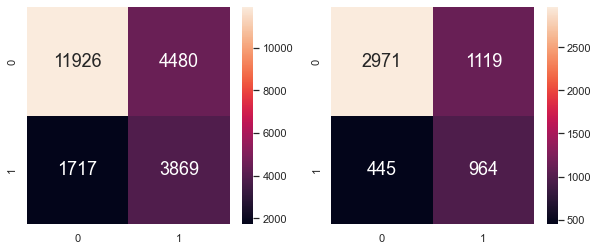

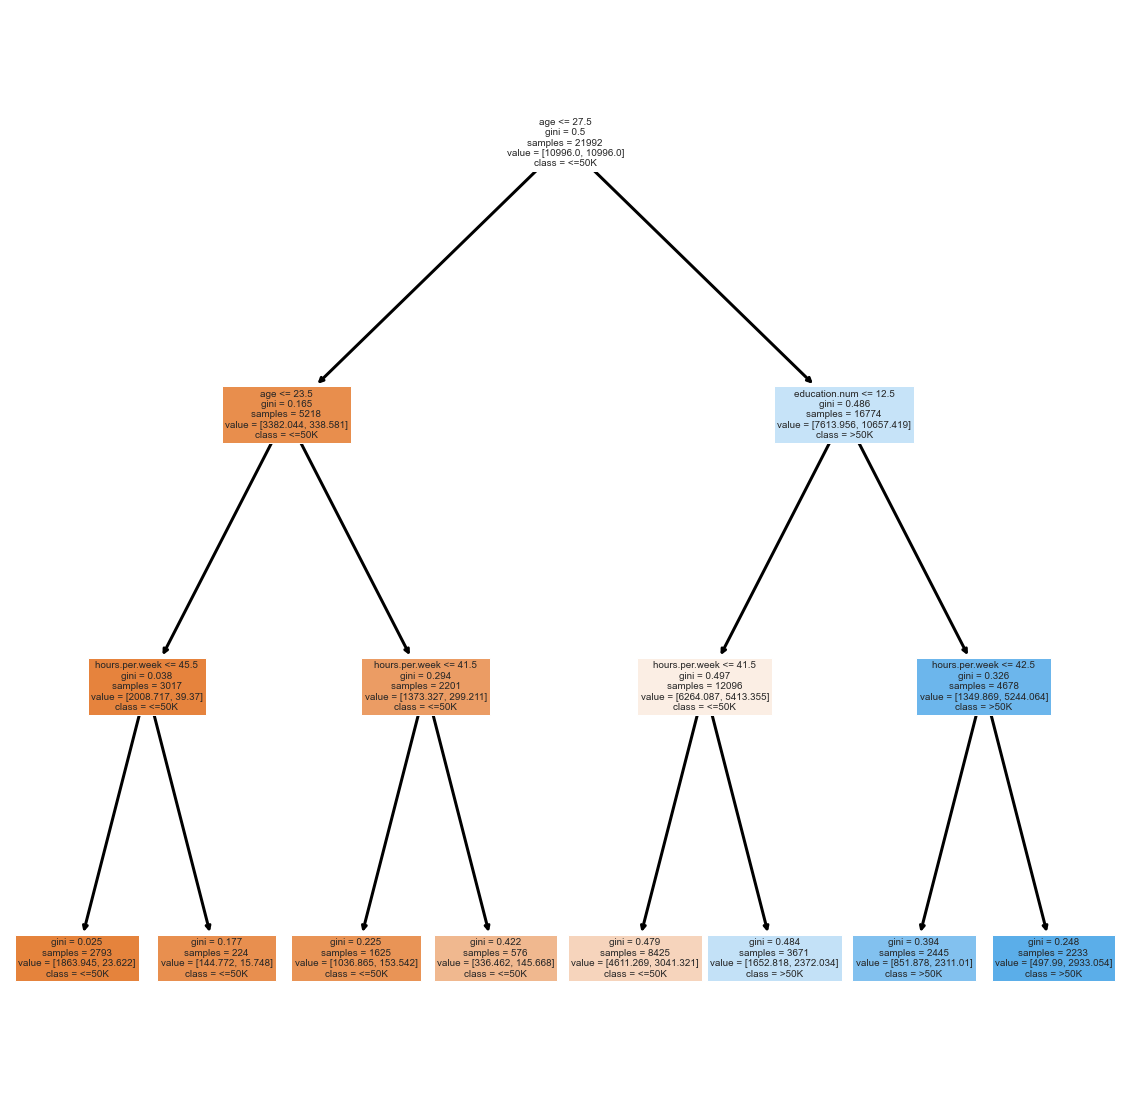

In [59]:
# Extract Response and Predictors
y = pd.DataFrame(data['income'])  # Response
X = pd.DataFrame(data[['age', 'education.num', 'hours.per.week']])    # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3, class_weight='balanced')  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(10, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
fig, ax = plt.subplots(figsize=(20, 20))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

In [60]:
# Check the Goodness of Fit (on Train Data)
CM_train = confusion_matrix(y_train, y_train_pred)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("Classification Report\n", classification_report(y_train, y_train_pred))

# Check the Goodness of Fit (on Test Data)
CM_test = confusion_matrix(y_test, y_test_pred)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("Classification Report\n", classification_report(y_test, y_test_pred))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7182157148053838
Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.73      0.79     16406
        >50K       0.46      0.69      0.56      5586

    accuracy                           0.72     21992
   macro avg       0.67      0.71      0.67     21992
weighted avg       0.77      0.72      0.73     21992

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7155846517548645
Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.73      0.79      4090
        >50K       0.46      0.68      0.55      1409

    accuracy                           0.72      5499
   macro avg       0.67      0.71      0.67      5499
weighted avg       0.77      0.72      0.73      5499



We obtained a classification accuracy of 0.716 for multi-variate prediction of `income`, which is higher than that of all the uni-variate classification accuracies discussed above.

### Cross Validation

We conduct cross-validation to find out the optimal **maximum depth** and **hyper-parameters** to increase the classification accuracy of the decision tree. `GridSearchCV` is a useful tool provided in `sklearn` to fine tune the parameters of our model.

In [61]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Extract Response and Predictors
y = pd.DataFrame(data['income'])
X = pd.DataFrame(data['age'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Define the Hyper-parameter Grid to search on, in case of Decision Forest
param_grid = {'max_depth': np.arange(2, 11)}     # depth of trees

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(DecisionTreeClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.income.ravel())

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy')

In [62]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model
print(np.abs(hpGrid.best_score_))

DecisionTreeClassifier(max_depth=2)
0.7468170295018268


From cross-validation, the optimal maximum depth of the Decision Tree Classifier is 2.


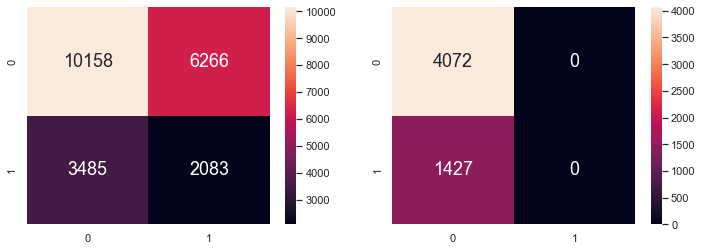

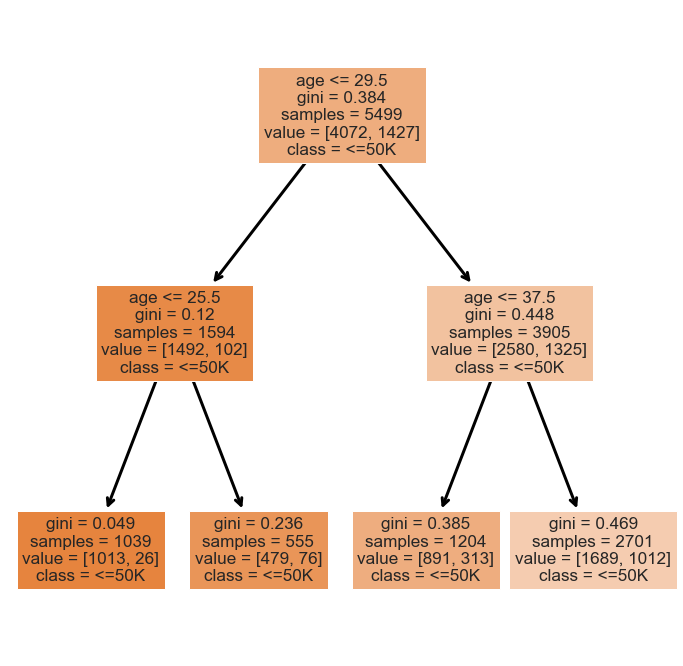

In [63]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_test, y_test)                      # train the decision tree model

# Predict Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

In [64]:
# Check the Goodness of Fit
CM_test = confusion_matrix(y_test, y_test_pred)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("Classification Report\n",classification_report(y_test, y_test_pred))

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.740498272413166
Classification Report
               precision    recall  f1-score   support

       <=50K       0.74      1.00      0.85      4072
        >50K       0.00      0.00      0.00      1427

    accuracy                           0.74      5499
   macro avg       0.37      0.50      0.43      5499
weighted avg       0.55      0.74      0.63      5499



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


After cross validation, the classification accuracy of the multi-variate Decision Tree increased from 0.716 to 0.740.

---

## Random Forest Classification

Random forest ia an example of ensemble learning, where it builds multiple decision trees and merges them together to get a more accurate and stable prediction.

In [65]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Dataset
y = pd.DataFrame(data['income'])                                     # Response
X = pd.DataFrame(data[['age', 'education.num', 'hours.per.week']])   # Predictors

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(200,1001,200),   # number of trees 100, 200, ..., 500
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.income.ravel())

# 7m4.9s to run

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 200,  400,  600,  800, 1000])},
             scoring='accuracy')

In [66]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=7, n_estimators=200)
0.7916059718810374


From cross-validation, the optimal maximum depth and number of estimators of the Random Forest Classifier are 6 and 200 respectively.

<AxesSubplot:>

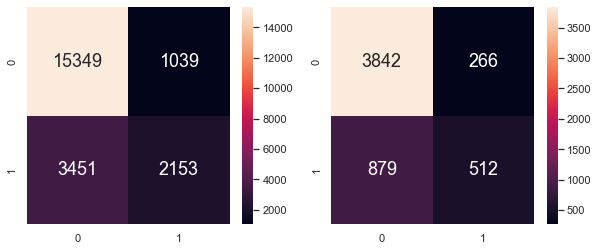

In [67]:
# Extract Response and Predictors
y = pd.DataFrame(data['income'])                                     # Response
X = pd.DataFrame(data[['age', 'education.num', 'hours.per.week']])   # Predictors

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 600,   # found using GridSearchCV
                                 max_depth = 7)       # found using GridSearchCV

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.income.ravel())

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(10, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [68]:
# Check the Goodness of Fit (on Train Data)
CM_train = confusion_matrix(y_train, y_train_pred)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print("Classification Report\n", classification_report(y_train, y_train_pred))

# Check the Goodness of Fit (on Test Data)
CM_test = confusion_matrix(y_test, y_test_pred)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print("Classification Report\n", classification_report(y_test, y_test_pred))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7958348490360131
Classification Report
               precision    recall  f1-score   support

       <=50K       0.82      0.94      0.87     16388
        >50K       0.67      0.38      0.49      5604

    accuracy                           0.80     21992
   macro avg       0.75      0.66      0.68     21992
weighted avg       0.78      0.80      0.77     21992

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7917803236952173
Classification Report
               precision    recall  f1-score   support

       <=50K       0.81      0.94      0.87      4108
        >50K       0.66      0.37      0.47      1391

    accuracy                           0.79      5499
   macro avg       0.74      0.65      0.67      5499
weighted avg       0.77      0.79      0.77      5499



## Conclusion
We obtained a classification accuracy of 0.792 from the Random Forest Classifier. Since it has the highest classification accuracy as compared to that of uni-variate Logistic Regression, uni-variate Decision Tree Classifier and multi-variate Decision Tree Classifier, we can conclude that **Random Forest Classifier is the best model** for our dataset.

In [69]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rforest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
education.num,0.404
age,0.365
hours.per.week,0.231


From Random Forest Classifier, `education.num` has the highest weightage in determining `income`, and `hours.per.week` is the least importance factor in predicting `income`. 

---

## One-Hot Encoding

One-hot encoding is the simplest type of categorical encoding. It takes each unique class in a list of class observations, and turns that into a True/False matrix where each unique class has its own column and its own binary value. This is to prevent a natural order from taking place if other encoding like integer encoding is used. This is the most common encoding used to ensure better performance and no unexpected results.

In [70]:
import sklearn as sk
# OneHotEncoding of categorical predictors
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder()

data_cat = data[['workclass','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']]

ohe.fit(data_cat)

data_cat_ohe = pd.DataFrame(ohe.transform(data_cat).toarray(), columns = ohe.get_feature_names(data_cat.columns))

data_cat_ohe = data_cat_ohe.join(data[['income','age','education.num','hours.per.week']])
data_cat_ohe

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,workclass_Gov,workclass_Private,workclass_Self_Emp,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,...,race_Black,race_Other,race_White,sex_Female,sex_Male,native.country_United-States,income,age,education.num,hours.per.week
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,<=50K,82,9,18
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,<=50K,54,4,40
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,<=50K,41,10,40
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,<=50K,34,9,45
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,<=50K,38,6,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27486,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,<=50K,22,10,40
27487,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,<=50K,27,12,38
27488,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,>50K,40,9,40
27489,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,<=50K,58,9,40


In [71]:
# Dataset
y = pd.DataFrame(data['income'])                          # Response
X = pd.DataFrame(data_cat_ohe.drop('income', axis = 1))   # Predictors

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(200,1001,200),   # number of trees 100, 200, ..., 500
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.income.ravel())

# 7m4.9s to run

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 200,  400,  600,  800, 1000])},
             scoring='accuracy')

In [72]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=10, n_estimators=600)
0.8276192520086783


<AxesSubplot:>

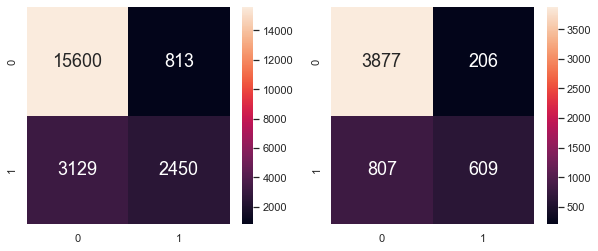

In [73]:
# Dataset
y = pd.DataFrame(data['income'])                          # Response
X = pd.DataFrame(data_cat_ohe.drop('income', axis = 1))   # Predictors

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 200,   # found using GridSearchCV
                                 max_depth = 6)       # found using GridSearchCV

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.income.ravel())

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(10, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [74]:
# Check the Goodness of Fit (on Train Data)
CM_train = confusion_matrix(y_train, y_train_pred)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print("Classification Report\n", classification_report(y_train, y_train_pred))

# Check the Goodness of Fit (on Test Data)
CM_test = confusion_matrix(y_test, y_test_pred)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print("Classification Report\n", classification_report(y_test, y_test_pred))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8207530010913059
Classification Report
               precision    recall  f1-score   support

       <=50K       0.83      0.95      0.89     16413
        >50K       0.75      0.44      0.55      5579

    accuracy                           0.82     21992
   macro avg       0.79      0.69      0.72     21992
weighted avg       0.81      0.82      0.80     21992

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8157846881251136
Classification Report
               precision    recall  f1-score   support

       <=50K       0.83      0.95      0.88      4083
        >50K       0.75      0.43      0.55      1416

    accuracy                           0.82      5499
   macro avg       0.79      0.69      0.72      5499
weighted avg       0.81      0.82      0.80      5499



In [75]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rforest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
marital.status_Married-civ-spouse,0.201
education.num,0.172
relationship_Husband,0.140
age,0.088
marital.status_Never-married,0.080
hours.per.week,0.045
occupation_Exec-managerial,0.036
relationship_Not-in-family,0.033
occupation_Prof-specialty,0.032


From Random Forest Classifier, `marital.status` has the highest weightage in determining `income`, followed by `relationship` and `occupation`. 

---

## Income predictor
We developed an income predictor capable of predicting an American citizen's `income` based on a set of user inputs.

In [76]:
from ipywidgets import interact, Dropdown

edu = {'Preschool':'1', '1st-4th':'2', '5th-6th':'3', '7th-8th':'4', '9th':'5', '10th':'6', '11th':'7', '12th':'8', 'HS-grad':'9', 'Some-college':'10', 'Assoc-voc':'11', 'Assoc-acdm':'12', 'Bachelors':'13', 'Masters':'14', 'Prof-school':'15', 'Doctorate':'16'}

#eduNumW.options = edu[eduW.value]
eduW = Dropdown(options = edu.keys())
ageW = Dropdown(options = list(range(1,101)))
WkHrW= Dropdown(options = list(range(1,101)))
genderW = Dropdown(options = ['Female','Male'])
countryW = Dropdown(options = ['United States'])
sectorW = Dropdown(options = ['Private','Government','Self Employed'])
raceW = Dropdown(options = ['White','Black','Asian Pacific Islander','American Indian Eskimo','Other'])
relationW = Dropdown(options = ['Husband','Not In Family','Own Child', 'Unmarried', 'Wife', 'Other Relative'])
occuW = Dropdown(options = ['Adm-clerical','Armed-Forces','Craft-repair','Exec-managerial','Farming-fishing','Handlers-cleaners','Machine-op-inspct','Other-service','Priv-house-serv','Prof-specialty','Protective-serv','Sales','Tech-support','Transport-moving'])
maritalW = Dropdown(options = ['Married-civ-spouse','Never-married','Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'])

@interact(Age = ageW, Sector = sectorW, Education = eduW, MaritalStatus = maritalW, Occupation = occuW, Relationship = relationW, Race = raceW, Gender = genderW, WorkHours = WkHrW,  Country = countryW)
def print_details(Age, Sector, Education, MaritalStatus, Occupation, Relationship, Race, Gender, WorkHours, Country):  
    print("\nYou have entered the following details: \n")
    print("Age: " + str(Age))
    print("Sector: " + Sector)
    print("Education: " + str(Education))
    print("Marital Status: " + MaritalStatus)
    print("Occupation: " + Occupation)
    print("Relationship: " + Relationship)
    print("Race: " + Race) 
    print("Gender: " + Gender)
    print("Working Hours Per Week: " + str(WorkHours))
    print("Country: " + Country)

    #declaring variables that represents each sub-category variables to have a vlaue of '0', representing False
    wG = wP = wSE = 0  #Sector
    msD = msMAFs = msMcs = msMsa = msNm = msS = msW = 0 #MaritalStatus
    oAc = oAf = oCr = oEm = oFf = oHc = oMoi = oOs = oPhs = oPs = oPserv = oS = oTs = oTm = 0 #Occupation
    rH = rNif = rOr = rOc = rU = rWife = 0 #Relationship
    rAIE = rAPI = rB = rO = rW = 0 #Race
    sF = sM = 0 #Gender
    ncUS = 1 #Country is set to '1' (True) since we are only dealing with 1 country (United States). hence it is always true.
    
    user_arr = [Sector, MaritalStatus, Occupation, Relationship, Race, Gender]
    
    for key in user_arr:
        #sector
        if key == 'Private':
            wP = 1
        if key == 'Government':
            wG = 1       
        if key == 'Self Employed':
            wSE = 1          
        
        #maritalstatus
        if key == 'Married-civ-spouse':
            msMcs = 1
        if key == 'Never-married':
            msNm = 1        
        if key == 'Divorced':
            msD = 1           
        if key == 'Separated':
            msS = 1
        if key == 'Widowed':
            msW = 1        
        if key == 'Married-spouse-absent':
            msMsa = 1 
        if key == 'Married-AF-spouse':
            msMAFs = 1 

        #occupation
        if key == 'Adm-clerical':
            oAc = 1
        if key == 'Armed-Forces':
            oAf = 1        
        if key == 'Craft-repair':
            oCr = 1           
        if key == 'Exec-managerial':
            oEm = 1
        if key == 'Farming-fishing':
            oFf = 1        
        if key == 'Handlers-cleaners':
            oHc = 1 
        if key == 'Machine-op-inspct':
            oMoi = 1
        if key == 'Other-service':
            oOs = 1
        if key == 'Priv-house-serv':
            oPhs = 1        
        if key == 'Prof-specialty':
            oPs = 1           
        if key == 'Protective-serv':
            oPserv = 1
        if key == 'Sales':
            oS = 1        
        if key == 'Tech-support':
            oTs = 1 
        if key == 'Transport-moving':
            oTm = 1
  
        #relationship
        if key == 'Husband':
            rH = 1
        if key == 'Wife':
            rWife = 1        
        if key == 'Not In Family':
            rNif = 1            
        if key == 'Own Child':
            rOc = 1             
        if key == 'Unmarried':
            rU = 1   
        if key == 'Other Relative':
            rOr = 1   
        
        #race
        if key == 'White':
            rW = 1
        if key == 'Black':
            rB = 1        
        if key == 'Asian Pacific Islander':
            rAPI = 1            
        if key == 'American Indian Eskimo':
            rAIE = 1
        if key == 'Other':
            rO = 1
        
        #gender
        if key == 'Female':
            sF = 1
        if key == 'Male':
            sM = 1
    
    
    print("\nYour income level would be: "+ rforest.predict([[wG,wP,wSE,msD,msMAFs,msMcs,msMsa,msNm,msS,msW,
                                                                oAc,oAf,oCr,oEm,oFf,oHc,oMoi,oOs,oPhs,oPs,oPserv,oS,oTs,oTm,
                                                                rH,rNif,rOr,rOc,rU,rWife,
                                                                rAIE,rAPI,rB,rO,rW,
                                                                sF,sM,
                                                                ncUS,
                                                                Age,
                                                                edu[eduW.value],
                                                                WorkHours]])[0])

interactive(children=(Dropdown(description='Age', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, …

### Try the predictor for yourself!

Sample datas extracted from CSV file

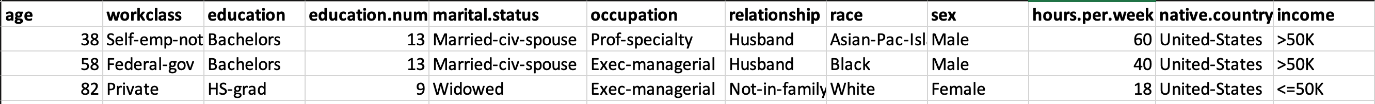

In [77]:
from IPython import display
display.Image("Capture.PNG")

---

## References

K Means Clustering:
 - https://www.kaggle.com/code/sasakitetsuya/world-universities-clustering-pca-analysis

Dython:
 - http://shakedzy.xyz/dython/

Logistic Regression:
 - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Decision Tree Classifier:
 - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
 
GridSearchCV:
 - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Random Forest Classifier:
 - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

One-hot Encoding:
 - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html